In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
credit_df = pd.read_csv('./data/train.csv')
credit_df.head()

/var/folders/35/w4mjwsg52fx_0rmkjw1fmr7c0000gn/T/ipykernel_72130/2716393001.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_df = pd.read_csv('./data/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
credit_df.count()

ID                          100000
Customer_ID                 100000
Month                       100000
Name                         90015
Age                         100000
SSN                         100000
Occupation                  100000
Annual_Income               100000
Monthly_Inhand_Salary        84998
Num_Bank_Accounts           100000
Num_Credit_Card             100000
Interest_Rate               100000
Num_of_Loan                 100000
Type_of_Loan                 88592
Delay_from_due_date         100000
Num_of_Delayed_Payment       92998
Changed_Credit_Limit        100000
Num_Credit_Inquiries         98035
Credit_Mix                  100000
Outstanding_Debt            100000
Credit_Utilization_Ratio    100000
Credit_History_Age           90970
Payment_of_Min_Amount       100000
Total_EMI_per_month         100000
Amount_invested_monthly      95521
Payment_Behaviour           100000
Monthly_Balance              98800
Credit_Score                100000
dtype: int64

In [4]:
credit_df.nunique(axis=0)

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [5]:
credit_df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
credit_df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [9]:
credit_df.shape

(100000, 28)

# Data Preprocessing

-Handle missing values in name column by looking up customer_id and using the name that belongs to the corresping id

In [10]:
all_Customer_ID = credit_df[credit_df['Name'].isnull()]['Customer_ID'].values
print(type(all_Customer_ID))
print(all_Customer_ID.shape)
#print(len(all_Customer_ID))
for id in all_Customer_ID:
  name = credit_df.loc[(credit_df['Customer_ID'] == id) & (credit_df['Name'].notna())]['Name'].values[0]
  credit_df.loc[(credit_df['Customer_ID'] == id) & (credit_df['Name'].isna()), ['Name']] = name

<class 'numpy.ndarray'>
(9985,)


In [11]:
credit_df[credit_df['Customer_ID'] == 'CUS_0xd40']['Name']

0    Aaron Maashoh
1    Aaron Maashoh
2    Aaron Maashoh
3    Aaron Maashoh
4    Aaron Maashoh
5    Aaron Maashoh
6    Aaron Maashoh
7    Aaron Maashoh
Name: Name, dtype: object

-Remove any additional characters in the age field i.e. '_', convert age field to type int, replace abnormal ages with the correct age of the person, looking up corresponding customer_id

In [12]:
#credit_df['Age'] = [str(s).replace('_', '') for s in credit_df['Age']]
#for val in credit_df['Age']:
#  credit_df['Age'] = str(val).replace('_', '')
credit_df['Age'] = [str(val).replace('_', '') for val in credit_df['Age']]
credit_df['Age'] = credit_df['Age'].astype(int)
abnormal_ages= credit_df[(credit_df['Age'] < 10) | (credit_df['Age'] > 70)]['Customer_ID'].values #id or abnoraml ages
print(abnormal_ages.shape)
for id in abnormal_ages:
    age = credit_df[credit_df['Customer_ID'] ==id]['Age'].drop_duplicates().values[0]
    if age < 10 or age > 70:
        age = credit_df[credit_df['Customer_ID'] ==id]['Age'].drop_duplicates().values[1]
    credit_df.loc[(credit_df['Customer_ID'] == id) & ((credit_df['Age'] < 10) | (credit_df['Age'] > 70)), ['Age']] = age

(2781,)


In [19]:
credit_df[credit_df['Customer_ID'] == 'CUS_0xd40']['Age']

0    23
1    23
2    23
3    23
4    23
5    23
6    23
7    23
Name: Age, dtype: int64

In [21]:
credit_df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

Replace occupation of '______' with the correct occupation of the applicant by looking up the corresponding customer_id

In [23]:
print(credit_df['Occupation'].isnull().sum())
credit_df[credit_df['Occupation'] == '_______']

0


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,47,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


In [24]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x4d43']['Occupation']

200    Entrepreneur
201         _______
202         _______
203    Entrepreneur
204    Entrepreneur
205    Entrepreneur
206    Entrepreneur
207    Entrepreneur
Name: Occupation, dtype: object

In [25]:
empty_occupations = credit_df[credit_df['Occupation']== '_______']['Customer_ID'].values
for id in empty_occupations:
  occupation = credit_df[credit_df['Customer_ID'] ==id]['Occupation'].drop_duplicates().values[0]
  if occupation == '_______':
    occupation = credit_df[credit_df['Customer_ID'] ==id]['Occupation'].drop_duplicates().values[1]
  credit_df.loc[(credit_df['Customer_ID'] == id) & (credit_df['Occupation'] == '_______'), ['Occupation']] = occupation

In [26]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x4d43']['Occupation']

200    Entrepreneur
201    Entrepreneur
202    Entrepreneur
203    Entrepreneur
204    Entrepreneur
205    Entrepreneur
206    Entrepreneur
207    Entrepreneur
Name: Occupation, dtype: object

Remove any additional characters in the annual_income field
i.e. '_', convert annual_income field to type float, replcae annual_income outliers by using the correct annual income from the corresponding customer_id

In [35]:
credit_df['Annual_Income'] = [str(val).replace('_', '') for val in credit_df['Annual_Income']]
credit_df['Annual_Income'] = credit_df['Annual_Income'].astype(float)

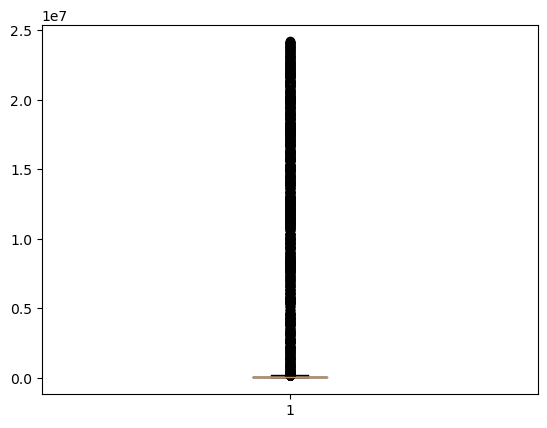

In [39]:
plt.boxplot(credit_df['Annual_Income'])
plt.show()

In [40]:
#credit_df.nlargest(5000, ['Annual_Income'])['Customer_ID']
credit_df[credit_df['Annual_Income'] > 500000]['Customer_ID']
credit_df[credit_df['Annual_Income'] < 5000]['Customer_ID']

Series([], Name: Customer_ID, dtype: object)

In [41]:
outlier_salary = credit_df[credit_df['Annual_Income']> 100000]['Customer_ID'].values
for id in outlier_salary:
    income = credit_df[credit_df['Customer_ID'] ==id]['Annual_Income'].min()
    credit_df.loc[(credit_df['Customer_ID'] ==id) &
              (credit_df['Annual_Income']> 100000), ['Annual_Income']] = income

In [46]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x284a']['Annual_Income']

48    131313.4
49    131313.4
50    131313.4
51    131313.4
52    131313.4
53    131313.4
54    131313.4
55    131313.4
Name: Annual_Income, dtype: float64

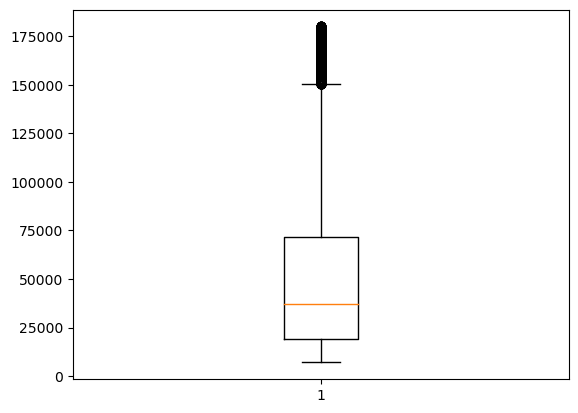

In [45]:
plt.boxplot(credit_df['Annual_Income'])
plt.show()

Replace null values with the correct monthly salary by looking up the corresponding customer_id

In [48]:
print('Null monthly salary count = ',credit_df['Monthly_Inhand_Salary'].isnull().sum())
credit_df['Monthly_Inhand_Salary'].replace(np.nan, -1.0, inplace=True)
null_msalary = credit_df[credit_df['Monthly_Inhand_Salary']==-1.0]['Customer_ID'].values
for id in null_msalary:
    salary = credit_df[credit_df['Customer_ID'] == id]['Monthly_Inhand_Salary'].drop_duplicates().values[0]
  #salary=credit_df[credit_df['Customer_ID'] ==
   #               id]['Monthly_Inhand_Salary'].drop_duplicates().sort_values().values[-1]
    if salary == -1.0:
        salary = credit_df[credit_df['Customer_ID'] == id]['Monthly_Inhand_Salary'].drop_duplicates().values[1]
    credit_df.loc[(credit_df['Customer_ID'] == id) & (credit_df['Monthly_Inhand_Salary'] == -1.0), ['Monthly_Inhand_Salary']] = salary

Null monthly salary count =  15002


In [49]:
credit_df[credit_df['Customer_ID'] == 'CUS_0xd40']['Monthly_Inhand_Salary']

0    1824.843333
1    1824.843333
2    1824.843333
3    1824.843333
4    1824.843333
5    1824.843333
6    1824.843333
7    1824.843333
Name: Monthly_Inhand_Salary, dtype: float64

In [50]:
print('Null monthly salary count = ',credit_df['Monthly_Inhand_Salary'].isnull().sum())
print(credit_df[credit_df['Monthly_Inhand_Salary'] == -1.0].size)

Null monthly salary count =  0
0


Replace abnormal bank account values with the correct value for the applicant by looking up corresponding customer_id

In [64]:
len(credit_df[(credit_df['Num_Bank_Accounts'] > 7)])

24779

In [60]:
len(credit_df[(credit_df['Num_Bank_Accounts'] < 0)])

21

In [70]:
credit_df[(credit_df['Num_Bank_Accounts'] > 7) |
        (credit_df['Num_Bank_Accounts'] < 0)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
56,0x1656,CUS_0x5407,January,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
57,0x1657,CUS_0x5407,February,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,_,1704.18,35.171160,14 Years and 8 Months,Yes,70.478333,38.4369827577036,High_spent_Large_value_payments,392.19618457022375,Poor
58,0x1658,CUS_0x5407,March,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
59,0x1659,CUS_0x5407,April,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,_,1704.18,29.762159,14 Years and 10 Months,Yes,70.478333,220.55219192916718,Low_spent_Small_value_payments,260.0809753987602,Poor
60,0x165a,CUS_0x5407,May,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,_,1704.18,30.206214,14 Years and 11 Months,Yes,70.478333,NaN,High_spent_Large_value_payments,397.2283547370202,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,0x25fdd,CUS_0x8600,April,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,_,3571.7,30.614953,5 Years and 11 Months,Yes,60.964772,43.72461709437765,High_spent_Large_value_payments,328.301277,Standard
99988,0x25fde,CUS_0x8600,May,Sarah McBridec,28,#F%$D@*&8,Architect,20002.88,1929.906667,10,...,_,3571.7,28.508250,6 Years and 0 Months,Yes,60.964772,213.97800979403817,Low_spent_Small_value_payments,208.047884,Standard
99989,0x25fdf,CUS_0x8600,June,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,Standard
99990,0x25fe0,CUS_0x8600,July,Sarah McBridec,28,031-35-0942,Architect,20002.88,1929.906667,10,...,Bad,3571.7,25.123535,NaN,Yes,60.964772,173.2755025599617,Low_spent_Large_value_payments,228.750392,Standard


In [71]:
abnormal_accounts = credit_df[(credit_df['Num_Bank_Accounts'] > 7) |(credit_df['Num_Bank_Accounts'] < 0)]['Customer_ID'].values

for id in abnormal_accounts:
    numAccounts = credit_df[credit_df['Customer_ID'] == id]['Num_Bank_Accounts'].drop_duplicates().values[0]
    if numAccounts < 0 or numAccounts > 11:
        numAccounts = credit_df[credit_df['Customer_ID'] == id]['Num_Bank_Accounts'].drop_duplicates().values[1]
    credit_df.loc[(credit_df['Customer_ID'] == id) & (
        (credit_df['Num_Bank_Accounts'] < 0) | (credit_df['Num_Bank_Accounts'] > 11)), ['Num_Bank_Accounts']] = numAccounts

In [74]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x4004']['Num_Bank_Accounts']

264    8
265    8
266    8
267    8
268    8
269    8
270    8
271    8
Name: Num_Bank_Accounts, dtype: int64

In [75]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x96ca']['Num_Bank_Accounts']

20256    10
20257    10
20258    10
20259    10
20260    10
20261    10
20262    10
20263    10
Name: Num_Bank_Accounts, dtype: int64

In [76]:
print('Null credit card count = ',credit_df['Num_Credit_Card'].isnull().sum())

Null credit card count =  0


In [77]:
credit_df['Num_Credit_Card'] = [str(val).replace('_', '') for val in credit_df['Num_Credit_Card']]
credit_df['Num_Credit_Card'] = credit_df['Num_Credit_Card'].astype(int)

In [78]:
#credit_df[(credit_df['Num_of_Loan'] > 10) |(credit_df['Num_of_Loan'] <= 0)]
print(credit_df[credit_df['Num_Credit_Card'] < 0].size)
credit_df[credit_df['Customer_ID'] == 'CUS_0x4100']['Num_Credit_Card']

0


152       7
153       7
154       7
155       7
156       7
157    1029
158       7
159       7
Name: Num_Credit_Card, dtype: int64

In [79]:
abnormal_cc = credit_df[credit_df['Num_Credit_Card'] > 7]['Customer_ID'].values
#print(abnormal_cc.size)
for id in abnormal_cc:
    #print(credit_df[credit_df['Customer_ID'] == id]['Num_Credit_Card'])
    cc = credit_df[credit_df['Customer_ID'] == id]['Num_Credit_Card'].drop_duplicates().values[0]
    if cc > 15:
        cc = credit_df[credit_df['Customer_ID'] == id]['Num_Credit_Card'].drop_duplicates().values[1]
    credit_df.loc[(credit_df['Customer_ID'] == id) & (
        (credit_df['Num_Credit_Card'] < 0) | (credit_df['Num_Credit_Card'] > 11)), ['Num_Credit_Card']] = cc

In [80]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x9bc1']['Num_Credit_Card']

336    3
337    3
338    3
339    3
340    3
341    3
342    3
343    3
Name: Num_Credit_Card, dtype: int64

In [81]:
credit_df['Interest_Rate'] = [str(val).replace('_', '') for val in credit_df['Interest_Rate']]
credit_df['Interest_Rate'] = credit_df['Interest_Rate'].astype(int)

In [82]:
print(credit_df[credit_df['Interest_Rate'] <= 0].size)
print('Null interest rate count = ',credit_df['Interest_Rate'].isnull().sum())

0
Null interest rate count =  0


In [83]:
credit_df[credit_df['Customer_ID'] == 'CUS_0x56c5']['Interest_Rate']
credit_df[credit_df['Customer_ID'] == 'CUS_0xc365']['Interest_Rate']


2712       5
2713       5
2714       5
2715    2197
2716       5
2717       5
2718       5
2719    2701
Name: Interest_Rate, dtype: int64

In [84]:
print(credit_df[credit_df['Interest_Rate'] > 100]['Customer_ID'].values.size)
print(credit_df[credit_df['Interest_Rate'] > 100]['Customer_ID'].unique().size)
print(credit_df[credit_df['Customer_ID'] == 'CUS_0x1915']['Interest_Rate'])

2012
1889
70152    4182
70153    4488
70154      20
70155      20
70156      20
70157      20
70158      20
70159      20
Name: Interest_Rate, dtype: int64


In [85]:
abnormal_interest = credit_df[credit_df['Interest_Rate'] > 100]['Customer_ID'].values
for id in abnormal_interest:
  if credit_df[credit_df['Customer_ID'] == id]['Interest_Rate'].drop_duplicates().values.size > 1:
    rate = credit_df[credit_df['Customer_ID'] == id]['Interest_Rate'].drop_duplicates().values[0]
    if rate > 100:
          rate = credit_df[credit_df['Customer_ID'] == id]['Interest_Rate'].drop_duplicates().values[1]
    credit_df.loc[(credit_df['Customer_ID'] == id) & (
        (credit_df['Interest_Rate'] < 0) | (credit_df['Interest_Rate'] > 11)), ['Interest_Rate']] = rate
  #else:
    #print(credit_df[credit_df['Customer_ID'] == id]['Interest_Rate'])
mean_interest = credit_df[credit_df['Interest_Rate'] <= 100]['Interest_Rate'].values

In [86]:
print(credit_df[credit_df['Customer_ID'] == 'CUS_0xac67']['Interest_Rate'])

17880    936
17881    936
17882    936
17883    936
17884    936
17885    936
17886    936
17887    936
Name: Interest_Rate, dtype: int64


In [87]:
credit_df['Num_of_Loan'] = [str(val).replace('_', '') for val in credit_df['Num_of_Loan']]
credit_df['Num_of_Loan'] = credit_df['Num_of_Loan'].astype(int)

In [88]:
credit_df[(credit_df['Num_of_Loan'] > 10) |(credit_df['Num_of_Loan'] <= 0)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
21,0x161f,CUS_0x2dbc,June,Langep,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,39.783993,18 Years and 2 Months,No,246.992319,257.80809942568976,High_spent_Medium_value_payments,963.9215811205684,Good
31,0x162d,CUS_0xb891,August,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,27.332515,17 Years and 10 Months,No,16.415452,125.61725053231268,High_spent_Small_value_payments,379.21638114119577,Standard
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.000000,276.72539431736266,!@9#%8,288.60552234930395,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.000000,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.13865100158367,Low_spent_Medium_value_payments,392.1922656650829,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99941,0x25f97,CUS_0xad4f,June,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,Standard,642.46,27.699504,NaN,No,0.000000,207.47345558788197,Low_spent_Small_value_payments,254.733128,Poor
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,Developer,22620.79,1722.065833,6,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor
99969,0x25fc3,CUS_0xf16,February,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good


In [89]:
abnormal_loan = credit_df[(credit_df['Num_of_Loan'] > 9) | (
    credit_df['Num_of_Loan'] <= 0)]['Customer_ID'].values

for id in abnormal_loan:
    numLoans = credit_df[credit_df['Customer_ID'] == id]['Num_of_Loan'].drop_duplicates().values[0]
    if numLoans < 0 or numLoans > 9:
        numLoans = credit_df[credit_df['Customer_ID'] == id]['Num_of_Loan'].drop_duplicates().values[1]
    credit_df.loc[(credit_df['Customer_ID'] == id) & (
        (credit_df['Num_of_Loan'] < 0) | (credit_df['Num_of_Loan'] > 9)), ['Num_of_Loan']] = numLoans

In [90]:
print(credit_df[credit_df['Customer_ID'] == 'CUS_0x9322']['Num_of_Loan'])
print(credit_df[credit_df['Customer_ID'] == 'CUS_0x4e53']['Num_of_Loan'])

24104    0
24105    0
24106    0
24107    0
24108    0
24109    0
24110    0
24111    0
Name: Num_of_Loan, dtype: int64
24584    1
24585    1
24586    1
24587    1
24588    1
24589    1
24590    1
24591    1
Name: Num_of_Loan, dtype: int64


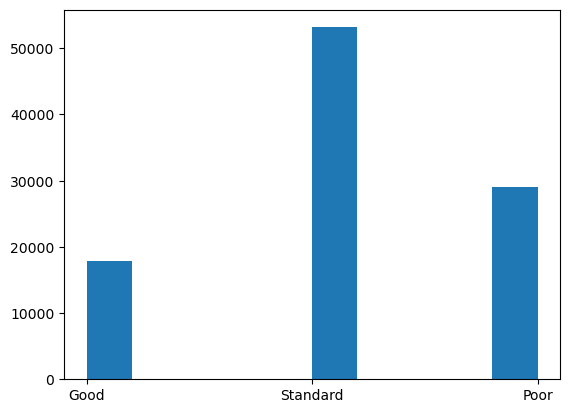

In [92]:
plt.hist(credit_df['Credit_Score'])
plt.show()

/var/folders/35/w4mjwsg52fx_0rmkjw1fmr7c0000gn/T/ipykernel_72130/2969837281.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = X_df.corr().abs()


<Axes: >

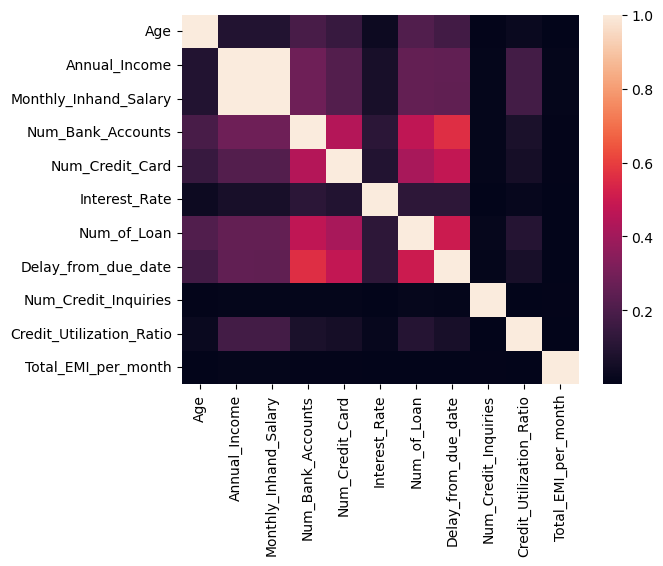

In [105]:
X_df = credit_df.drop('Credit_Score', axis=1)
corr_matrix = X_df.corr().abs()
sns.heatmap(corr_matrix)

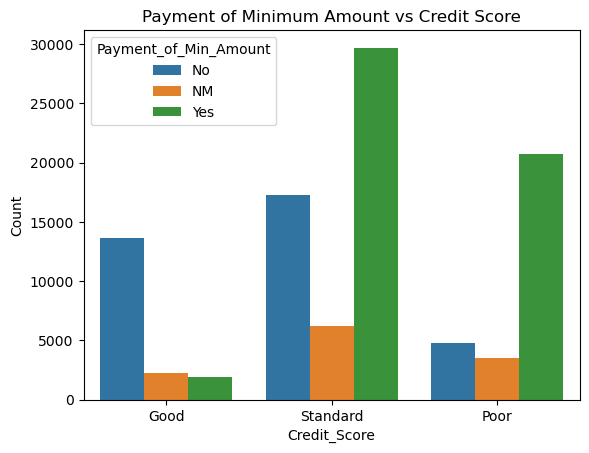

In [115]:
data = credit_df.groupby(['Payment_of_Min_Amount','Credit_Score'],sort=False,as_index=False).count()
sns.barplot(data=data,x='Credit_Score',y='ID',hue='Payment_of_Min_Amount').set_title('Payment of Minimum Amount vs Credit Score')
plt.ylabel('Count')
plt.show()

In [ ]:
# Shumail

In [ ]:
# df = pd.read_csv('train.csv')

In [ ]:
df = credit_df # for consistent changes on the same data frames

In [ ]:
df.count()

In [ ]:
df.info()

In [ ]:
df.nunique(axis=0)

In [ ]:
df.isnull().sum()

In [ ]:
# feature 13: Type_of_Loan (Represents the average number of days delayed from the payment date)

In [ ]:
t = df.loc[df['Type_of_Loan'].isna(), ['Customer_ID', 'Type_of_Loan']]

In [ ]:
r = t.groupby('Customer_ID')['Type_of_Loan'].agg(lambda x: x.isna().sum() != 8)
r[r].reset_index()

In [ ]:
# these missing values are empty for all the 8 months of customer ids and hence, cannot be computed.

In [ ]:
df['Type_of_Loan'].value_counts()[:5] # replacing missing values with the most popular category: Not Specified

In [ ]:
df['Type_of_Loan'].fillna('Not Specified', inplace=True)

In [ ]:
# feature 14: Delay_from_due_date (Represents the average number of payments delayed by a person)

In [ ]:
df['Delay_from_due_date'].unique()

In [ ]:
df['Delay_from_due_date'].mean() # mean delay days in payments

In [ ]:
# feature 15: Num_of_Delayed_Payment (Represents the percentage change in credit card limit)

In [ ]:
df['Num_of_Delayed_Payment'].unique()

In [ ]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'(\d+)_', r'\1', regex=True) # remove value_ with value

In [ ]:
arr = df['Num_of_Delayed_Payment'].unique()
non_digit_values = [str(value) for value in arr if re.search(r'\D', str(value))]

for value in non_digit_values:
    print(value)

In [ ]:
t1 = df.loc[df['Num_of_Delayed_Payment'].isna(), ['Customer_ID', 'Num_of_Delayed_Payment']]

In [ ]:
r = t1.groupby('Customer_ID')['Num_of_Delayed_Payment'].agg(lambda x: x.isna().sum() == 8)
r[r].reset_index()

In [ ]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce') # convert to numeric

In [ ]:
df['Num_of_Delayed_Payment'] = np.where(df['Num_of_Delayed_Payment'] < 0, np.nan, df['Num_of_Delayed_Payment'])

In [ ]:
result = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].mean()
result

In [ ]:
for i in range(len(df['Num_of_Delayed_Payment'])):
  if pd.isna(df.at[i, 'Num_of_Delayed_Payment']):
    df.loc[i, 'Num_of_Delayed_Payment'] = result[df['Customer_ID'][i]].copy()

In [ ]:
df['Num_of_Delayed_Payment'].unique()[:40]

In [ ]:
df['Num_of_Delayed_Payment'].mean() # mean number of payments delayed

In [ ]:
# feature 16: Changed_Credit_Limit (Represents the percentage change in credit card limit)

In [ ]:
df['Changed_Credit_Limit'].head(15)

In [ ]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('_', np.nan)
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce') # convert to numeric

In [ ]:
df[df['Changed_Credit_Limit'] < 0]

In [ ]:
df['Changed_Credit_Limit'][pd.isna(df['Changed_Credit_Limit'])]

In [ ]:
t2 = df.loc[df['Changed_Credit_Limit'].isna(), ['Customer_ID', 'Changed_Credit_Limit']]

In [ ]:
r = t2.groupby('Customer_ID')['Changed_Credit_Limit'].agg(lambda x: x.isna().sum() == 8)
r[r].reset_index()

In [ ]:
result = df.groupby('Customer_ID')['Changed_Credit_Limit'].mean()
result

In [ ]:
for i in range(len(df['Changed_Credit_Limit'])):
  if pd.isna(df.at[i, 'Changed_Credit_Limit']):
    df.loc[i, 'Changed_Credit_Limit'] = result[df['Customer_ID'][i]].copy()

In [ ]:
df['Changed_Credit_Limit'].unique()[:40]

In [ ]:
df['Changed_Credit_Limit'].mean() # mean % change in credit card limit

In [ ]:
# feature 17: Num_Credit_Inquiries (Represents the number of credit card inquiries)

In [ ]:
df['Num_Credit_Inquiries'].unique()

In [ ]:
df[df['Num_Credit_Inquiries'] < 0]

In [ ]:
df['Num_Credit_Inquiries'][pd.isna(df['Num_Credit_Inquiries'])]

In [ ]:
t3 = df.loc[df['Num_Credit_Inquiries'].isna(), ['Customer_ID', 'Num_Credit_Inquiries']]

In [ ]:
r = t3.groupby('Customer_ID')['Num_Credit_Inquiries'].agg(lambda x: x.isna().sum() == 8)
r[r].reset_index()

In [ ]:
result = df.groupby('Customer_ID')['Num_Credit_Inquiries'].mean()
result

In [ ]:
for i in range(len(df['Num_Credit_Inquiries'])):
  if pd.isna(df.at[i, 'Num_Credit_Inquiries']):
    df.loc[i, 'Num_Credit_Inquiries'] = result[df['Customer_ID'][i]].copy()

In [ ]:
df['Num_Credit_Inquiries'].unique()[:40]

In [ ]:
df['Num_Credit_Inquiries'].mean() # mean number of credit card inquiries

In [ ]:
# feature 18: Credit_Mix (Represents the classification of the mix of credits)

In [ ]:
df.loc[:,['Customer_ID', 'Credit_Mix']].head(15)

In [ ]:
df['Credit_Mix'].unique()

In [ ]:
df['Credit_Mix'] = df['Credit_Mix'].replace('_', np.nan)

In [ ]:
result = df.groupby('Customer_ID')['Credit_Mix'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
result

In [ ]:
for i in range(len(df['Credit_Mix'])):
  if pd.isna(df.at[i, 'Credit_Mix']):
    df.loc[i, 'Credit_Mix'] = result[df['Customer_ID'][i]]

In [ ]:
# feature 19: Outstanding_Debt (Represents the remaining debt to be paid (in USD))

In [ ]:
arr = df['Outstanding_Debt'].unique()
arr

In [ ]:
for value in arr:
    if value.endswith('_'):
        print(value)

In [ ]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'(\d+)_', r'\1', regex=True) # remove value_ with value

In [ ]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce') # convert to numeric

In [ ]:
df[df['Outstanding_Debt'] < 0]

In [ ]:
df['Outstanding_Debt'][pd.isna(df['Num_Credit_Inquiries'])]

In [ ]:
df['Outstanding_Debt'].mean() # 1426 USD outstanding debt on average

In [ ]:
# feature 20: Credit_Utilization_Ratio (Represents the utilization ratio of credit card)

In [ ]:
df['Credit_Utilization_Ratio']

In [ ]:
df[df['Credit_Utilization_Ratio'] < 0]

In [ ]:
df['Credit_Utilization_Ratio'].nunique()

In [ ]:
df['Credit_Utilization_Ratio'].mean() # average utilization ratio of credit card is 32

In [ ]:
# feature 21: Credit_History_Age

In [ ]:
df['Credit_History_Age'].head(10)

In [ ]:
df.loc[:,['Customer_ID', 'Credit_History_Age']].head(30)

In [ ]:
years_months = df["Credit_History_Age"].str.extract(r'(\d+)\s*Years?\s*and\s*(\d+)\s*Months?')

In [ ]:
years_months.head(15)

In [ ]:
years_months.loc[1, 0]

In [ ]:
for col in years_months.columns:
    years_months[col] = pd.to_numeric(years_months[col], errors='coerce')

In [ ]:
for i in range(len(years_months[0])):
  if pd.isna(years_months.at[i, 1]):
    if i%8 == 0:
      years_months.loc[i, 1] = 1
    else:
      years_months.loc[i, 1] = years_months.loc[i-1, 1] + 1

In [ ]:
years_months[years_months.isna().any(axis=1)]

In [ ]:
years_months['Customer_ID'] = df['Customer_ID']

In [ ]:
result = years_months.groupby('Customer_ID')[0].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
result

In [ ]:
for i in range(len(years_months[0])):
  if pd.isna(years_months.at[i, 0]):
    years_months.loc[i, 0] = result[years_months['Customer_ID'][i]]

In [ ]:
years_months[2] = (years_months[0] * 12) + years_months[1]
years_months

In [ ]:
df['Credit_History_Age'] = years_months[2]

In [ ]:
df['Credit_History_Age'].mean() # 221 months is the average age of credit history

In [ ]:
# feature 22: Payment_of_Min_Amount (Represents whether only the minimum amount was paid by the person)

In [ ]:
df['Payment_of_Min_Amount']

In [ ]:
df['Payment_of_Min_Amount'].unique()

In [ ]:
df['Payment_of_Min_Amount'].value_counts()

In [ ]:
# feature 23: Total_EMI_per_month (Represents the monthly EMI payments (in USD))

In [ ]:
df['Total_EMI_per_month']

In [ ]:
df[df['Total_EMI_per_month'] < 0]

In [ ]:
df['Total_EMI_per_month'].unique()[:100]

In [ ]:
df['Total_EMI_per_month'].mean() # average monthly EMI payments (in USD) are 1403

In [ ]:
# feature 24: Amount_invested_monthly (Represents the monthly amount invested by the customer (in USD))

In [ ]:
df['Amount_invested_monthly'].unique()[:200]

In [ ]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'_', '')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce') # convert to numeric

In [ ]:
df[df['Amount_invested_monthly'] < 0]

In [ ]:
t4 = df.loc[df['Amount_invested_monthly'].isna(), ['Customer_ID', 'Amount_invested_monthly']]

In [ ]:
r = t4.groupby('Customer_ID')['Amount_invested_monthly'].agg(lambda x: x.isna().sum() == 8)
r[r].reset_index()

In [ ]:
result = df.groupby('Customer_ID')['Amount_invested_monthly'].mean()
result

In [ ]:
for i in range(len(df['Amount_invested_monthly'])):
  if pd.isna(df.at[i, 'Amount_invested_monthly']):
    df.loc[i, 'Amount_invested_monthly'] = result[df['Customer_ID'][i]].copy()

In [ ]:
df['Amount_invested_monthly'].isna().sum()

In [ ]:
df['Amount_invested_monthly'].mean() # average monthly amount invested is 638 USD

In [ ]:
# feature 25: Payment_Behaviour (Represents the payment behavior of the customer (in USD))

In [ ]:
df['Payment_Behaviour']

In [ ]:
df['Payment_Behaviour'].value_counts()

In [ ]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', 'Not_specified')

In [ ]:
# feature 26: Monthly_Balance (Represents the monthly balance amount of the customer (in USD))

In [ ]:
df['Monthly_Balance']

In [ ]:
df['Monthly_Balance'].unique()[300:500]

In [ ]:
df[df['Monthly_Balance'].isna()]

In [ ]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce') # convert to numeric

In [ ]:
df[df['Monthly_Balance'] < 0]

In [ ]:
t5 = df.loc[df['Monthly_Balance'].isna(), ['Customer_ID', 'Monthly_Balance']]

In [ ]:
r = t5.groupby('Customer_ID')['Monthly_Balance'].agg(lambda x: x.isna().sum() == 8)
r[r].reset_index()

In [ ]:
result = df.groupby('Customer_ID')['Monthly_Balance'].mean()
result

In [ ]:
for i in range(len(df['Monthly_Balance'])):
  if pd.isna(df.at[i, 'Monthly_Balance']):
    df.loc[i, 'Monthly_Balance'] = result[df['Customer_ID'][i]].copy()

In [ ]:
df['Monthly_Balance'].mean() # average monthly balance is 403 USD

In [ ]:
# feature 27: Credit_Score ()

In [ ]:
df['Credit_Score'].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.count()

In [ ]:
df.info()

In [ ]:
# Preprocessing features from 13 to 27

In [ ]:
# encoding response variable
mapping = {'Standard': 0.5, 'Poor': 0, 'Good': 1}
df['Credit_Score'] = df['Credit_Score'].replace(mapping)
df['Credit_Score'].value_counts()

In [ ]:
# dropping columns no longer needed for modeling phase

In [ ]:
df['Type_of_Loan'].unique()[:20]

In [ ]:
len(df['Type_of_Loan'].unique())

In [ ]:
new_df = df.drop(['ID', 'Customer_ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1)

In [ ]:
new_df.info()

In [ ]:
new_df['Month'].value_counts()

In [ ]:
new_df['Payment_of_Min_Amount'].value_counts()

In [ ]:
new_df['Payment_Behaviour'].value_counts()

In [ ]:
new_df['Occupation'].value_counts()

In [ ]:
new_df['Credit_Mix'].value_counts()

In [ ]:
# encoding all categorical features as one-hot-encoding except for credit_mix which will be ordinally encoded

new_df =  pd.get_dummies(new_df, columns = ['Month', 'Occupation', 'Payment_of_Min_Amount', 'Payment_Behaviour'], drop_first=True)
new_df

In [ ]:
quality_order = ['Bad', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[quality_order])
encoder.fit(new_df[['Credit_Mix']])

new_df['Credit_Mix'] = encoder.transform(new_df[['Credit_Mix']].values.reshape(-1, 1))
new_df['Credit_Mix'].value_counts()

In [ ]:
# splitting df into df_X and df_Y
df_X = new_df.drop(columns=['Credit_Score'])
df_Y = new_df['Credit_Score']

In [ ]:
# correlation matrices and dropping more features with correlations > 0.9

In [ ]:
df_X.corr()

In [ ]:
corr = df_X.corr().abs()
utm = np.triu(np.ones(corr.shape), k=1).astype(bool)
upper = corr.where(utm)

to_drop = [column for column in upper.columns if any(upper[column] >= 0.90)]
print('Columns dropped: ', to_drop) # monthly_inhand_salary has a correlation of 0.998237 with annual_income --> hence, dropped.
df_X.drop(to_drop, axis=1, inplace=True)

df_X

In [ ]:
# Model training